# Покемоны и AB-тестирование


# Описание задачи

![banner](https://storage.googleapis.com/kaggle-datasets-images/635/1204/126be74882028aac7241553cef0e27a7/dataset-original.jpg)

Покемоны - это маленькие существа, которые сражаются друг с другом на соревнованиях. Все покемоны имеют разные характеристики (сила атаки, защиты и т. д.) И относятся к одному или двум так называемым классам (вода, огонь и т. д.).
Профессор Оук является изобретателем Pokedex, портативного устройства, которое хранит информацию обо всех существующих покемонах. Как его ведущий специалист по данным, Вы только что получили от него запрос с просьбой осуществить аналитику данных на всех устройствах Pokedex.

## Описание набора данных
Профессор Оук скопировал все содержимое память одного устройства Pokedex, в результате чего получился набор данных, с которым Вы будете работать в этой задаче. В этом файле каждая строка представляет характеристики одного покемона:

* `pid`: Numeric - ID покемона
* `HP`: Numeric - Очки здоровья
* `Attack`: Numeric - Сила обычной атаки
* `Defense`: Numeric - Сила обычной защиты
* `Sp. Atk`: Numeric - Сила специальной атаки
* `Sp. Def`: Numeric - Сила специальной защиты
* `Speed`: Numeric - Скорость движений
* `Legendary`: Boolean - «True», если покемон редкий
* `Class 1`: Categorical - Класс покемона
* `Class 2`: Categorical - Класс покемона

In [ ]:
 # Подгрузим пакеты
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
matplotlib.style.use('ggplot')
%matplotlib inline
import seaborn as sns

In [ ]:
pokemon = pd.read_csv('pokemon.csv', error_bad_lines=False)  # Откроем датасет
pokemon.head()


# Обратите внимание, что у покемона может быть один или два класса.
# Если у покемона два класса, считается, что они имеют одинаковую значимость.

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


# Задачи

<div class="alert alert-info">
<b>Задание № 1:</b>
    
Профессор Оук подозревает, что покемоны в классе `grass` имеют более сильную обычную атаку, чем у покемонов в классе `rock`. Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
    
Примечание: если есть покемоны, которые относятся к обоим классам, просто выбросьте их;
    
Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

</div>


In [ ]:
# Уберем лишние столбцы (оставим pid, Class 1, Class 2 и Attack):
df_1 = pokemon[['pid', 'Class 1', 'Class 2', 'Attack']]

df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   pid      800 non-null    int64 
 1   Class 1  800 non-null    object
 2   Class 2  414 non-null    object
 3   Attack   800 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 25.1+ KB


In [ ]:
# Посмотрим, имеются ли покемоны, относящиеся одновременно к классу 'Grass' и 'Rock'
df_1.loc[(df_1['Class 1'].isin(['Grass', 'Rock'])) & (df_1['Class 2'].isin(['Grass', 'Rock']))]

,pid,Class 1,Class 2,Attack
377,378,Rock,Grass,41
378,379,Rock,Grass,81


In [ ]:
# Покемоны, относящиеся одновеменно к обоим классам имеются.
# Это покемоны с pid 378 и 379, удалим строки с ними по индексам строк:
df_1 = df_1.drop(labels = [377, 378], axis = 0)
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 798 entries, 0 to 799
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   pid      798 non-null    int64 
 1   Class 1  798 non-null    object
 2   Class 2  412 non-null    object
 3   Attack   798 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 31.2+ KB


In [ ]:
# Сформируем 2 выборки: одну с покемонами Grass, вторую - с покемонами Rock.
# Для этого из датафрейма df_1 сформируем два:
# df_1_gr - с покемонами Grass и Rock в столбце Class 1, df_2_gr - с покемонами Grass И Rock в столбце Class 2.
df_1_gr = df_1.loc[(df_1['Class 1'] == 'Grass') | (df_1['Class 1'] == 'Rock')]
df_1_gr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112 entries, 0 to 796
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   pid      112 non-null    int64 
 1   Class 1  112 non-null    object
 2   Class 2  70 non-null     object
 3   Attack   112 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 4.4+ KB


In [ ]:
# Датафрейм df_1_gr разделим на два набора (оставим один столбец Attack): df_1_g - с покемонами Grass и df_1_r - с покемонами Rock:
df_1_g = df_1_gr['Attack'].loc[df_1_gr['Class 1'] == 'Grass']
df_1_r = df_1_gr['Attack'].loc[df_1_gr['Class 1'] == 'Rock']

In [ ]:
len(df_1_g), len(df_1_r)

(70, 42)

In [ ]:
# Аналогично для столбца Class 2:
df_2_gr = df_1.loc[(df_1['Class 2'] == 'Grass') | (df_1['Class 2'] == 'Rock')]
df_2_gr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 51 to 787
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   pid      37 non-null     int64 
 1   Class 1  37 non-null     object
 2   Class 2  37 non-null     object
 3   Attack   37 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 1.4+ KB


In [ ]:
df_2_g = df_2_gr['Attack'].loc[df_2_gr['Class 2'] == 'Grass']
df_2_r = df_2_gr['Attack'].loc[df_2_gr['Class 2'] == 'Rock']

In [ ]:
len(df_2_g), len(df_2_r)

(23, 14)

In [ ]:
# Посмотрим, как отличаются статистики для наборов grass и rock.
# Сформируем два набора данных: один с силами атаки покемонов Grass, второй - покемонов класса Rock.
# Для этого выполним конкатенацию строк наборов: df_1_g с df_2_g (получим набор grass); df_1_r с df_2_r (получим набор rock):
grass = pd.concat([df_1_g, df_2_g])
rock = pd.concat([df_1_r, df_2_r])
grass.describe(), rock.describe()

(count     93.000000
 mean      73.731183
 std       24.179645
 min       27.000000
 25%       59.000000
 50%       70.000000
 75%       95.000000
 max      132.000000
 Name: Attack, dtype: float64, count     56.000000
 mean      91.785714
 std       34.805284
 min       10.000000
 25%       63.000000
 50%       92.500000
 75%      116.250000
 max      165.000000
 Name: Attack, dtype: float64)

In [ ]:
# Средняя и медианная сила обычной атаки покемонов Grass (73,7 и 70,0 соотвктственно) меньше, чем покемонов Rock (91,8 и 92,5 соответственно),
# о том же говорят значения процентилей и максимальные значения.

In [ ]:
# Проверим, есть ли статистическое различие в силе обычной атаки покемонов Grass и Rock.
# В качестве нулевой гипотезы примем, что различий в силе обычной атаки покемонов рассматриваемых классов нет.
# Уровень значимости зададим 5% (0,05). По условию задачи распределение обычной атаки считаем нормальным. Выполним t-test:
t, p = stats.ttest_ind(grass, rock)
t, p

(-3.729457582692065, 0.00027333381459902653)

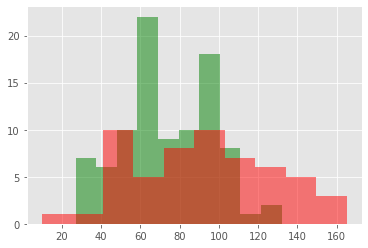

In [ ]:
# p-value значительно меньше 0,05. На всякий случай визуализируем распределения обычной атаки покемонов Grass и rock:
plt.hist(grass, alpha = 0.5, color = 'g');
plt.hist(rock, alpha = 0.5, color = 'r');

In [ ]:
# Судя по гистограммам, в наборах данных могут присутствовать выбросы,
# взглянем на боксплоты:

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


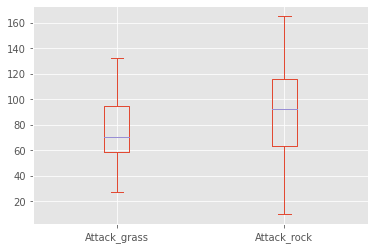

In [ ]:
g_and_r = pd.concat([grass, rock], axis = 1)
g_and_r.columns = ['Attack_grass', 'Attack_rock']
g_and_r.plot.box();
# Судя по боксплотам, выбросов нет. В остальном, по боксплотам наглядно видно различие статистик, полученных ранее методом .describe().

In [ ]:
# Избавимся от экстремальных значений в наборах и посмотрим, как это повлияет на результат.
# Т.к. по условию задачи распределение нормальное, для поиска выбросов будем использовать межквартильный размах.
# Рассчитаем 25-ый и 75-ый процентили:
# Для набора grass:
lower_g = grass.quantile(q = 0.025)
upper_g = grass.quantile(q = 0.975)
# Для набора rock:
lower_r = rock.quantile(q = 0.025)
upper_r = rock.quantile(q = 0.975)
print('Grass:', lower_g, upper_g, 'Rock:', lower_r, upper_r)

Grass: 30.0 113.50000000000001 Rock: 40.75 162.5


In [ ]:
# Примем значения, меньшие 25-го процентиля и больше 75-го, за выбросы:
g = grass.loc[(grass < lower_g) | (grass > upper_g)]
r = rock.loc[(rock < lower_r) | (rock > upper_r)]
g, r

(310    130
 363    115
 511    132
 606     27
 Name: Attack, dtype: int64, 149     40
 268    164
 454    165
 230     10
 Name: Attack, dtype: int64)

In [ ]:
# Исключим эти значения (их индексы в наборе grass 310, 363, 511 и 606, в наборе rock 149, 268, 454, 230)
# И еще раз выполним t-тест:
grass_new = grass.drop([310, 363, 511, 606], axis = 0)
rock_new = rock.drop([149, 268, 454, 230], axis = 0)
len(grass_new), len(rock_new)

(89, 52)

In [ ]:
t1, p1 = stats.ttest_ind(grass_new, rock_new)
t1, p1

(-4.292328932685175, 3.294661930888647e-05)

In [ ]:
# p-value по-прежнему значительно меньше уровня значимости,
# следовательно, есть значительное отличие в силе обычной атаки покемонов Grass и Rock.

(count     89.000000
 mean      72.505618
 std       22.158070
 min       30.000000
 25%       59.000000
 50%       70.000000
 75%       92.000000
 max      110.000000
 Name: Attack, dtype: float64, count     52.000000
 mean      91.557692
 std       30.253448
 min       42.000000
 25%       64.750000
 50%       92.500000
 75%      112.750000
 max      160.000000
 Name: Attack, dtype: float64)

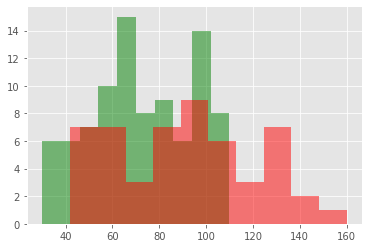

In [ ]:
# После исключения из наборов grass и rock значений, которые могут быть выбросами, гистограммы принципиально не изменились,
# как и значения статистик:
plt.hist(grass_new, alpha = 0.5, color = 'g');
plt.hist(rock_new, alpha = 0.5, color = 'r');
grass_new.describe(), rock_new.describe()

In [ ]:
# Вывод: нулевую гипотезу отвергаем. Считаем, что разница в силе обычной атаки между покемонами классов Grass и Rock есть.
# В среднем сила обычной атаки покемонов Grass меньше, чем покемонов Rock
# (возможно за счет того, что в классе Rock есть несколько покемонов, сила обычной атаки которых больше, чем у самых сильных в классе Grass:
# самый сильный среди Grass имеет атаку 110, а среди Rock есть те, у которых атака от 112 до 160).
# Таким образом, профессор Оук ошибся.

<div class="alert alert-info">
<b>Задание № 2:</b>
    
Профессор Оук уже долго не может спать по ночам ведь его волнует вопрос, а правда, что покемоны что покемоны в классе `Water` в среднем более быстрые, чем покемоны в классе `Normal`.
    
    
Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
Примечание: если есть покемоны относятся к обоим классам, выбросьте их;
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

In [ ]:
pokemon[:5]

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


In [ ]:
# Сформируем датафрейм df_2 с нужными столбцами:
df_2 = pokemon[['pid', 'Class 1', 'Class 2', 'Speed']]
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   pid      800 non-null    int64 
 1   Class 1  800 non-null    object
 2   Class 2  414 non-null    object
 3   Speed    800 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 25.1+ KB


In [ ]:
# Посмотрим, имеются ли покемоны, относящие одновременно к классу 'Water' и 'Normal'
df_2.loc[(df_2['Class 1'].isin(['Water', 'Normal'])) & (df_2['Class 2'].isin(['Water', 'Normal']))]

,pid,Class 1,Class 2,Speed
445,446,Normal,Water,71


In [ ]:
# Есть один покемон, относящийся одновременно к обоим классам, его pid 446.
# Удалим строку с ним:
df_2 = df_2.drop(labels = [445], axis = 0)
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 799 entries, 0 to 799
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   pid      799 non-null    int64 
 1   Class 1  799 non-null    object
 2   Class 2  413 non-null    object
 3   Speed    799 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 31.2+ KB


In [ ]:
# Сформируем 2 выборки: одну с покемонами Water, вторую - с покемонами Normal.
# Для этого из датафрейма df_2 сделаем два:
# df_1_wn - с покемонами Water и Normal в столбце Class 1, df_2_wn - с покемонами Water и Normal в столбце Class 2.
df_1_wn = df_2.loc[(df_2['Class 1'] == 'Water') | (df_2['Class 1'] == 'Normal')]
df_1_wn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209 entries, 9 to 763
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   pid      209 non-null    int64 
 1   Class 1  209 non-null    object
 2   Class 2  89 non-null     object
 3   Speed    209 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 8.2+ KB


In [ ]:
# Датафрейм df_1_wn разделим на два набора (оставим один столбец Speed): df_1_w - с покемонами Water и df_1_n - с покемонами Normal:
df_1_w = df_1_wn['Speed'].loc[df_1_wn['Class 1'] == 'Water']
df_1_n = df_1_wn['Speed'].loc[df_1_wn['Class 1'] == 'Normal']
len(df_1_w), len(df_1_n)

(112, 97)

In [ ]:
# Аналогично для столбца Class 2:
df_2_wn = df_2.loc[(df_2['Class 2'] == 'Water') | (df_2['Class 2'] == 'Normal')]
df_2_wn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 149 to 799
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   pid      17 non-null     int64 
 1   Class 1  17 non-null     object
 2   Class 2  17 non-null     object
 3   Speed    17 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 680.0+ bytes


In [ ]:
df_2_wn['Class 2'].unique()

array(['Water', 'Normal'], dtype=object)

In [ ]:
df_2_w = df_2_wn['Speed'].loc[df_2_wn['Class 2'] == 'Water']
df_2_n = df_2_wn['Speed'].loc[df_2_wn['Class 2'] == 'Normal']
len(df_2_w), len(df_2_n)

(13, 4)

In [ ]:
# Посмотрим, как отличаются статистики скрости покемонов классов Water и Normal.
# Сформируем два набора данных: один с силами атаки покемонов Grass, второй - покемонов класса Rock,
# Для этого склеим строки серий: df_1_g с df_2_g (получим набор grass); df_1_r с df_2_r (получим набор rock):
water = pd.concat([df_1_w, df_2_w])
normal = pd.concat([df_1_n, df_2_n])
water.describe(), normal.describe()

(count    125.00000
 mean      64.93600
 std       22.74889
 min       15.00000
 25%       50.00000
 50%       65.00000
 75%       81.00000
 max      122.00000
 Name: Speed, dtype: float64, count    101.000000
 mean      72.257426
 std       28.427330
 min        5.000000
 25%       50.000000
 50%       72.000000
 75%       93.000000
 max      135.000000
 Name: Speed, dtype: float64)

In [ ]:
# Исходя из значений статистик можно предположить, что покемоны класса Water способны развивать большую скорость
# (среднее, медианное, максимальное значения для класса Water больше), чем покемоны класса Normal.
# Проверим, есть ли статистическое различие в скорости покемонов Water и Normal.

In [ ]:
# В качестве нулевой гипотезы примем, что различий в скорости покемонов рассматриваемых классов нет.
# Уровень значимости зададим 5% (0,05). По условию задачи распределение скорости считаем нормальным. Выполним t-test:
t, p = stats.ttest_ind(water, normal)
t, p

(-2.150913330007121, 0.03255353551391033)

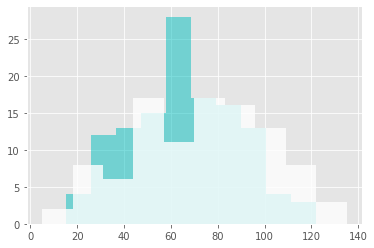

In [ ]:
# p-value меньше заданного уровня значимости, что говорит в пользу отклонения нулевой гипотезы.
# Визуализируем распределения скорости покемонов рассматриваемых классов с помощью гистограмм:
plt.hist(water, alpha = 0.5, color = 'c');
plt.hist(normal, alpha = 0.8, color = 'white');

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


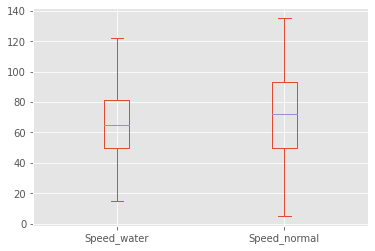

In [ ]:
w_and_n = pd.concat([water, normal], axis = 1)
w_and_n.columns = ['Speed_water', 'Speed_normal']
w_and_n.plot.box();

In [ ]:
# По гистограмме набора water, возможно есть выбросы (субъективно). Боксплоты выбросов не показали.
# Т.к. t-тест чувствителен к выбросам (а также в целях закрепления учебного материала), проведем дополнительно тест Манна-Уитни:
stat, p_v = stats.mannwhitneyu(water, normal)
stat, p_v

(5299.5, 0.038108151905529956)

In [ ]:
# p-value по результатам теста Манна-Уитни меньше уровня значимости, значит нулевую гипотезу отклоняем,
# считаем, что различия в скорости передвижения покемонов класса Water и Normal статистически значимо.
# Попробуем отфильтровать выбросы. Т.к. распределение по условию задачи нормальное,
# выбросы определим по межквартильному размаху (как в предыдущей задаче):
lower_w = water.quantile(q = 0.025)
upper_w = water.quantile(q = 0.975)
# Для набора rock:
lower_n = normal.quantile(q = 0.025)
upper_n = normal.quantile(q = 0.975)
print('Water:', lower_w, upper_w, 'Normal:', lower_n, upper_n)

Water: 25.5 108.0 Normal: 20.0 123.0


In [ ]:
w = water.loc[(water < lower_w) | (water > upper_w)]
n = normal.loc[(normal < lower_n) | (normal > upper_n)]
w, n

(85      15
 130    115
 209     15
 466    115
 625     22
 726    122
 398     25
 Name: Speed, dtype: int64, 188     15
 300    125
 476    135
 495      5
 716    128
 Name: Speed, dtype: int64)

In [ ]:
water_new = water.drop([85, 130, 209, 466, 625, 726, 398], axis = 0)
normal_new = normal.drop([188, 300, 476, 495, 716], axis = 0)

t2, p2 = stats.ttest_ind(water_new, normal_new)
t2, p2

(-2.107864652566702, 0.03621750352339849)

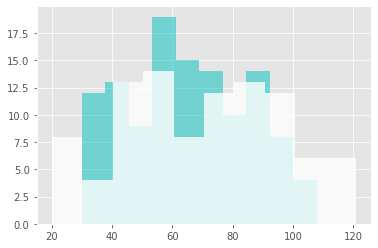

In [ ]:
# Результаты стат.теста не изменились. Статистики и гистограммы для наборов данных без экстремальных значений:
water_new.describe(), normal_new.describe()
plt.hist(water_new, alpha = 0.5, color = 'c');
plt.hist(normal_new, alpha = 0.8, color = 'white');

In [ ]:
# Вывод: различия в скорости покемонов Water и Normal статистически значимы. В среднем покемоны класса Normal более быстрые, т.к.
# среднее, медианное, максмальное значения скорости покемонов Normal выше, чем аналогичные статистики скорости покемонов Water.
# Т.е профессор Оук ошибся.

<div class="alert alert-info">
<b>Задание № 3:</b>
    
Профессор Оук тот еще безумец. Он изобрел сыворотку, способную ускорить покемона. Однако, мы усомнились в эффективности его вакцины. Професоор дал эту сыворотку следующим покемонам: смотри массив `treathed_pokemon`. Проверьте, работает ли вообще его сыворотка, убедите всех в своем выводе статистически.
    
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

In [ ]:
pokemon.head()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


In [ ]:
# Покемоны, которые принимали сыворотку увеличения скорости
treated_pokemon = ['Mega Beedrill', 'Mega Alakazam',
                    'Deoxys Normal Forme', 'Mega Lopunny']

In [ ]:
# Будем работать с двумя выборками: treathed_pokemon и все остальные покемоны.
# Сформируем наборы данных о скорости для обеих выборок.
df_3 = pokemon[['pid', 'Name', 'Class 1', 'Class 2', 'Speed']]
df_3 = df_3.set_index(['Name'])

df_3_treated = df_3.loc[treated_pokemon][['pid', 'Class 1', 'Class 2', 'Speed']]
df_3_treated = df_3_treated.reset_index()
df_3_treated

,Name,pid,Class 1,Class 2,Speed
0,Mega Beedrill,20,Bug,Poison,145
1,Mega Alakazam,72,Psychic,NaN,150
2,Deoxys Normal Forme,429,Psychic,NaN,150
3,Mega Lopunny,477,Normal,Fighting,135


In [ ]:
df_3_other = df_3.drop(labels = treated_pokemon, axis = 0)
df_3_other = df_3_other.reset_index()
df_3_other[:3]

,Name,pid,Class 1,Class 2,Speed
0,Bulbasaur,1,Grass,Poison,45
1,Ivysaur,2,Grass,Poison,60
2,Venusaur,3,Grass,Poison,80


In [ ]:
# Наборы данных о скорости покемонов, принимавших сыворотку (treated), и остальных (other):
treated = df_3_treated['Speed']
other = df_3_other['Speed']

In [ ]:
# Т.к. по условию задачи распределение нормальное, сравнивать будем выборку treated с генеральной совокупностью other, воспользуемся одновыборочным критерием Cтьюдента.
# Нулевая гипотеза: различий в скорости покемонов с сывороткой и без нее нет. Зададимся уровнем значимости в 5% (0,05).
stat, p = stats.ttest_1samp(a = treated, popmean = other.mean())
stat, p

(21.809447244054226, 0.000210988857535239)

In [ ]:
# p-value значительно меньше уровня значимости, поэтому нулевую гипотезу отклоняем. Считаем, что различия в скорости покемонов с сывороткой и без нее стат.значимы.
# Сравним статистики выборок:
treated.describe(), other.describe()

(count      4.000000
 mean     145.000000
 std        7.071068
 min      135.000000
 25%      142.500000
 50%      147.500000
 75%      150.000000
 max      150.000000
 Name: Speed, dtype: float64, count    796.000000
 mean      67.891960
 std       28.614785
 min        5.000000
 25%       45.000000
 50%       65.000000
 75%       90.000000
 max      180.000000
 Name: Speed, dtype: float64)

In [ ]:
# Значения средней скорости, мин-ой и макс-ой, медианной для покемонов, принимающих сыворотку, значительно больше аналогичных значений для остальных покемонов.
# Вывод: сыворотка действует, профессор Оук молодец.

<div class="alert alert-info">
<b>Задание № 4:</b>
    
Профессор Оук тот еще безумец. Он изобрел сыворотку, способную ускорить покемона. Однако, мы усомнились в эффективности его вакцины. Професоор дал эту сыворотку следующим покемонам: смотри массив `treathed_pokemon`. Проверьте, работает ли вообще его сыворотка, убедите всех в своем выводе статистически.
    
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

In [ ]:
# Задание дублируется...

<div class="alert alert-info">
<b>Задание № 5:</b>
    
Профессор Оук всегда любил истории про легендарных покемонов. Однако, профессор не очень уверен, что они самые лучшие относительно остальных покемонов. Оук предложил разобраться в этом нам. Проверьте, действительно ли сумма характеристик `HP`,`Attack`,`Defense` у легендарных покемонов выше, чем у других покемонов? А произведение этих же параметров?? Найдите ответы на эти вопросы и убедите всех в своем выводе статистически.
   

Вы можете предположить, что распределение сумм и произведений этих параметров является нормальным для всех классов покемонов.

</div>

In [ ]:
pokemon[:3]

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False


In [ ]:
# Сформируем датафрейм из следующих столбцов: pid, HP, Attack, Defence, Sum (сумма характеристик), Prod (произведение характеристик) и Legendary.
df_5 = pokemon[['pid', 'HP', 'Attack', 'Defense', 'Legendary']]
df_5['Sum'] = df_5.HP + df_5.Attack + df_5.Defense
df_5['Prod'] = df_5.HP * df_5.Attack * df_5.Defense
df_5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,pid,HP,Attack,Defense,Legendary,Sum,Prod
0,1,45,49,49,False,143,108045
1,2,60,62,63,False,185,234360
2,3,80,82,83,False,245,544480
3,4,80,100,123,False,303,984000
4,5,39,52,43,False,134,87204
...,...,...,...,...,...,...,...
795,796,50,100,150,True,300,750000
796,797,50,160,110,True,320,880000
797,798,80,110,60,True,250,528000
798,799,80,160,60,True,300,768000


In [ ]:
# Проверим, выше ли сумма характеристик у легендарных покемонов по сравнению с остальными.
# Из датафрейма df_5 сформируем два набора данных о сумме характеристик: в одном Legendary = False, во втором Legendary = True.
sum_false = df_5['Sum'].loc[df_5.Legendary == False]
sum_true = df_5['Sum'].loc[df_5.Legendary == True]

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


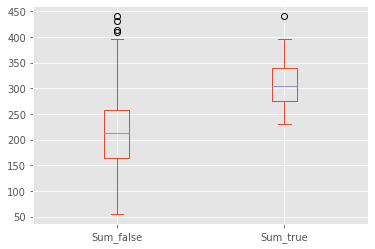

In [ ]:
# Взглянем на боксплоты получившихся наборов:
f_and_t_sum = pd.concat([sum_false, sum_true], axis = 1)
f_and_t_sum.columns = ['Sum_false', 'Sum_true']
f_and_t_sum.plot.box();

In [ ]:
# На диаграммах присутствуют выбросы. Т.к. тест Стьюдента к ним чувствителен, сначала отфильтруем выбросы из наборов данных:
lower_f = sum_false.quantile(q = 0.025)
upper_f = sum_false.quantile(q = 0.975)

lower_t = sum_true.quantile(q = 0.025)
upper_t = sum_true.quantile(q = 0.975)

# Найдем значения, меньшие 25-го процентиля и больше 75-го:
sf = sum_false.loc[(sum_false < lower_f) | (sum_false > upper_f)]
st = sum_true.loc[(sum_true < lower_t) | (sum_true > upper_t)]
sf, st

(55      90
 68      60
 87     350
 99      95
 120    355
 139     85
 141    359
 179     90
 186     75
 187    103
 206     90
 223    360
 224    430
 229    360
 232    380
 257     90
 268    414
 283    360
 293    100
 301    100
 303     78
 307    102
 313    410
 332    360
 333    440
 381     55
 409    370
 412    345
 413    375
 446    103
 462    102
 487     90
 494    393
 515    385
 585    350
 789    396
 Name: Sum, dtype: int64, 163    396
 415    230
 424    440
 431    235
 Name: Sum, dtype: int64)

In [ ]:
# Согласно боксплотам, выбросы лежат в диапазоне значений от 380 и выше (примерно), поэтому среди значений наборов sf и st отберем те,
# которые входят в указанный диапазон (их и будем считать выбросами).
sf = sf[sf > 390]
st = st[st > 390]
sf, st

(224    430
 268    414
 313    410
 333    440
 494    393
 789    396
 Name: Sum, dtype: int64, 163    396
 424    440
 Name: Sum, dtype: int64)

In [ ]:
# Удалим из набора sum_false значения с индексами 224, 268, 313, 333, 494, 515, 789. Из набора sum_true - значение с индексами 163, 424:
sum_false_new = sum_false.drop([224, 268, 313, 333, 494, 515, 789], axis = 0)
sum_true_new = sum_true.drop([163, 424], axis = 0)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


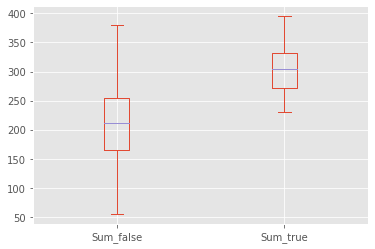

In [ ]:
# Новые боксплоты:
f_and_tsum = pd.concat([sum_false_new, sum_true_new], axis = 1)
f_and_tsum.columns = ['Sum_false', 'Sum_true']
f_and_tsum.plot.box();

In [ ]:
# Будем считать, что выбросы отфильтрованы.
# Применим t-тест.
# Нулевая гипотеза: величина суммы характеристик легендарных и нелегендарных покемонов не отличаются.
# Уровень значимости примем равным 5% (0,05).
s_sum, p_sum = stats.ttest_ind(sum_false_new, sum_true_new)
s_sum, p_sum

(-11.73031259594351, 2.099573844011812e-29)

In [ ]:
# p-value значительно меньше уровня значимости, следовательно, отвергаем нулевую гипотезу.
# Считаем, что величина суммы характеристик легендарных покемонов значительно отличается от суммы характеристик остальных покемонов.

In [ ]:
# Расчет статистик:
sum_false_new.describe(), sum_true_new.describe()

(count    728.000000
 mean     212.532967
 std       61.708228
 min       55.000000
 25%      165.000000
 50%      211.000000
 75%      255.250000
 max      380.000000
 Name: Sum, dtype: float64, count     63.000000
 mean     305.619048
 std       42.600329
 min      230.000000
 25%      272.500000
 50%      304.000000
 75%      332.000000
 max      395.000000
 Name: Sum, dtype: float64)

In [ ]:
# Вывод: все значения статистик (меры центральной тенденции) в выборке для легендарных покемонов выше, чем у нелегендарных,
# следовательно, можно считать, что сумма характеристик `HP`,`Attack`,`Defense` у легендарных покемонов выше, чем у других.

In [ ]:
# Чтобы ответить на второй вопрос (о том, выше ли произведение характеристик у легендарных покемонов, чем у других),
# выполним аналогичные действия для наборов данных о произведении характеристик (столбец 'Prod' в df_5).
# Из датафрейма df_5 сформируем два набора данных о произведении характеристик: в одном Legendary = False, во втором Legendary = True.
prod_false = df_5['Prod'].loc[df_5.Legendary == False]
prod_true = df_5['Prod'].loc[df_5.Legendary == True]

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


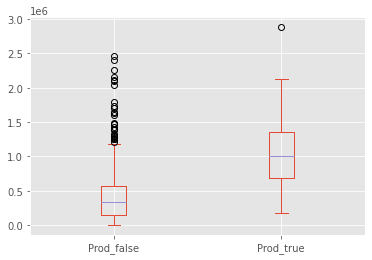

In [ ]:
# Взглянем на боксплоты получившихся наборов:
f_and_t_prod = pd.concat([prod_false, prod_true], axis = 1)
f_and_t_prod.columns = ['Prod_false', 'Prod_true']
f_and_t_prod.plot.box();

In [ ]:
# На диаграммах присутствуют выбросы. Т.к. тест Стьюдента к ним чувствителен, сначала отфильтруем выбросы из наборов данных:
lower_fp = prod_false.quantile(q = 0.025)
upper_fp = prod_false.quantile(q = 0.975)

lower_tp = prod_true.quantile(q = 0.025)
upper_tp = prod_true.quantile(q = 0.975)

# Найдем значения, меньшие 25-го процентиля и больше 75-го:
pf = prod_false.loc[(prod_false < lower_fp) | (prod_false > upper_fp)]
pt = prod_true.loc[(prod_true < lower_tp) | (prod_true > upper_tp)]
pf, pt

(55       13750
 68        7500
 99       31500
 120    1638000
 121       6250
 139      11000
 141    1605025
 179      24000
 186      12000
 187      35000
 206      27000
 224    2156250
 229    1470000
 232    1702000
 257      20250
 261      25500
 267    1474000
 268    2460000
 283    1650000
 293      36000
 301      36000
 303      17500
 313    2400000
 316       4050
 333    2254000
 381       6000
 409    1790750
 412    1404000
 413    1740000
 462      37800
 487      22500
 488       2500
 494    2111400
 500    1427328
 515    2093000
 585    1491750
 594    1396500
 789    2045160
 Name: Prod, dtype: int64, 424    2880000
 428     375000
 429     180000
 711    2125000
 Name: Prod, dtype: int64)

In [ ]:
# Согласно боксплотам, выбросы лежат в диапазоне значений примерно от 2750000 и выше (для легендарных) и 1000000 (для нелегендарных),
# поэтому среди значений наборов pf и pt отберем те, которые входят в указанный диапазон (их и будем считать выбросами).
pf = pf[pf > 1000000]
pt = pt[pt > 2750000]
pf, pt

(120    1638000
 141    1605025
 224    2156250
 229    1470000
 232    1702000
 267    1474000
 268    2460000
 283    1650000
 313    2400000
 333    2254000
 409    1790750
 412    1404000
 413    1740000
 494    2111400
 500    1427328
 515    2093000
 585    1491750
 594    1396500
 789    2045160
 Name: Prod, dtype: int64, 424    2880000
 Name: Prod, dtype: int64)

In [ ]:
# Удалим из наборов prod_false и prod_true полученные значения:
prod_false_new = prod_false.drop([120, 141, 224, 229, 232, 267, 268, 283, 313, 333, 409, 412, 413, 494, 500, 515, 585, 594, 789], axis = 0)
prod_true_new = prod_true.drop([424], axis = 0)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


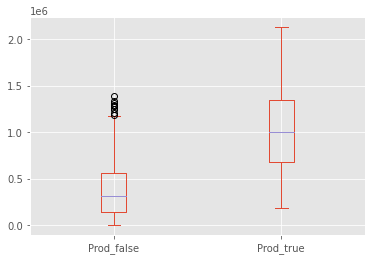

In [ ]:
# Новые боксплоты:
f_and_tpr = pd.concat([prod_false_new, prod_true_new], axis = 1)
f_and_tpr.columns = ['Prod_false', 'Prod_true']
f_and_tpr.plot.box();

In [ ]:
# Оставшиеся экстремальные значения в наборе для нелегендарных покемонов оставим, т.к. они на 1-2 порядка меньше ранее отфильтрованных.
# Будем считать, что выбросы отфильтрованы.
# Применим t-тест.
# Нулевая гипотеза: величина произведений характеристик легендарных и нелегендарных покемонов не отличаются.
# Уровень значимости примем равным 5% (0,05).
s_prod, p_prod = stats.ttest_ind(prod_false_new, prod_true_new)
s_prod, p_prod

(-16.457984564687894, 1.904623814757892e-52)

In [ ]:
# p-value значительно меньше уровня значимости, следовательно, отвергаем нулевую гипотезу.
# Принимаем, что величина произведений характеристик легендарных покемонов значительно отличается от произведения характеристик остальных покемонов.


In [ ]:
# Статистики:
prod_false_new.describe(), prod_true_new.describe()

(count    7.160000e+02
 mean     3.884026e+05
 std      2.939961e+05
 min      2.500000e+03
 25%      1.458075e+05
 50%      3.186250e+05
 75%      5.590670e+05
 max      1.386000e+06
 Name: Prod, dtype: float64, count    6.400000e+01
 mean     1.057909e+06
 std      4.686517e+05
 min      1.800000e+05
 25%      6.804375e+05
 50%      1.000000e+06
 75%      1.350000e+06
 max      2.125000e+06
 Name: Prod, dtype: float64)

In [ ]:
# Судя по величинам статистик, в среднем величина произведений характеристик больше у покемонов, которые не относятся к легендарным.
# На фоне ответа на первый вопрос данное заключение выглядит сомнительным (возможно, такая картина сложилась из-за того, что не все выбросы были отфильтрованы).

<div class="alert alert-info">
<b>Задание № 6:</b>
    
Профессор Оук частенько наблюдает за боями покемонов. После очередных таких боев Оук выделил три класса `best_defence_class`, которые на его взгляд одинаковы по "силе обычной защиты" `Defense`. Проверьте, действительно ли эти классы покемонов не отличаются по уровню защиты статистически значимо? Все та же статистика вам в помощь!
   

Вы можете предположить, что распределение сумм и произведений этих параметров является нормальным для всех классов покемонов.

</div>

In [ ]:
best_defence_class = ['Rock', 'Ground', 'Steel', 'Ice']
best_defence_class

['Rock', 'Ground', 'Steel', 'Ice']